In [1]:
import numpy as np  #importing numpy
import matplotlib.pyplot as plt
import pandas as pd       #importing pandas 
import seaborn as sns    # importing seaborn lib
from sklearn.model_selection import train_test_split
import warnings
import requests
warnings.filterwarnings("ignore")

In [2]:
# importing and reading the csv raw data
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv', index_col=False)
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#Snapshot
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


### Data Exploration

In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


* From the info we can say that there are no missing values

In [6]:
data.shape
print("Number of rows :" ,len(data))
print("Number of columns :" ,len(data.columns))

Number of rows : 200
Number of columns : 5


#### Statistical measure of data

In [7]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
data=data.drop(columns="Unnamed: 0")

In [9]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

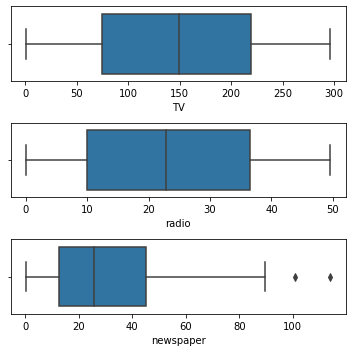

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['radio'], ax = axs[1])
plt3 = sns.boxplot(data['newspaper'], ax = axs[2])

plt.tight_layout()

* There are no considerable outliers present in the data.

### Data Analysis

#### Univariate Analysis
#### Sales (Target Variable)

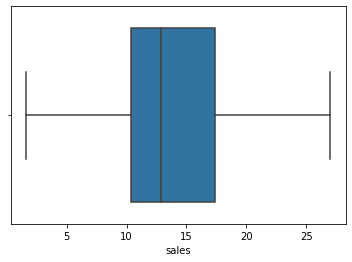

In [12]:
sns.boxplot(data['sales'])
plt.show()

* There is no outlier present in target Sales

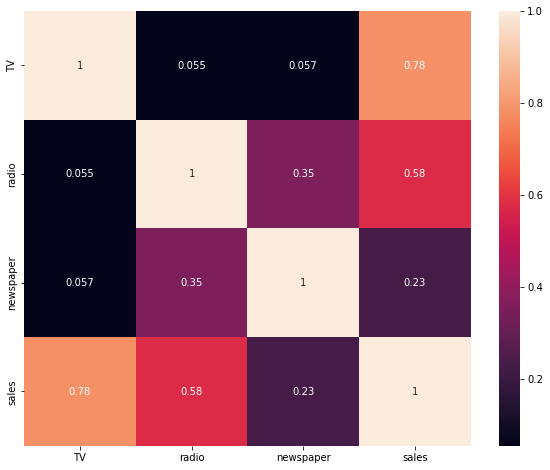

In [13]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True , color = "yellow");

* As it is visible from the heatmap, the variable TV seems to be most correlated with Sales
* So let's go ahead and perform simple linear regression using TV as our feature variable.

####  Seperating features and Target

In [14]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

#### Spliting the data into Training and Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=2,test_size=0.2)

In [16]:
print(X_train.shape ,X_test.shape, X.shape)

(160, 3) (40, 3) (200, 3)


### Model Training
#### Logistic Regression

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(X_train,Y_train)

LinearRegression()

In [19]:
print(f"Linear coefficients : {model.coef_}")

Linear coefficients : [0.04735257 0.17323832 0.00466519]


In [20]:
#intercept value

model.intercept_

3.0544520115813825

In [21]:
X_train_prediction = model.predict(X_train)

In [22]:
print(X_train_prediction)

[21.29995014 17.20629021 21.19085727 14.93544794 19.83406828 18.71196999
 17.40255999  9.98842359  9.53536321 12.2876625  12.63978635 14.56291507
 17.39742969 17.16037478  8.27269304 16.77434692  8.81798422  3.8301498
  7.54396092 24.83273801 19.63736323 19.47643108 10.6163053  21.76426599
 18.38297158 10.28845723 18.90246663  6.28244393  3.86349482  9.1554719
 10.95900544 10.51659209 15.72903137  9.98905125 12.18030755  6.84893877
  4.72661329  9.7367636  14.50160555 19.02256142 23.26594314 23.30401795
 14.68576091 12.71052842 17.19847606 20.82151838 17.42371728 10.48644112
 24.33933074 15.76864728 18.44407626 10.21183774 15.27231757 19.42401704
 13.76397481 22.02820093 15.6469129  23.50002078 18.18555568 14.46430201
 15.02592567  6.89504798 19.42303578  8.5285362  21.59570413 10.46650973
 15.28909988 21.31076299 13.13731039 16.5140188   4.82254423 16.89468993
 14.60368914 13.07683082 17.48226755 12.07203182 13.54449315 10.35517239
  8.40172007 15.62469751 10.30615642 20.77115735  9.9

In [23]:
X_test_prediction = model.predict(X_test)

In [24]:
print(X_test_prediction)

[14.0533655   9.3596964   6.84168105 15.57542062 18.24566528 15.69705683
  7.30213681 20.55741282 12.91982687 17.56977582 10.56954425 19.44183679
  9.02152837 10.39883137 14.23578821 12.14385282  8.89722911 17.65602288
 16.59817803 18.63325138 16.91499972 16.20074839 11.56907383 11.79479752
 15.14324825 12.31833158 15.39070301  7.93709454 16.78291467 14.14997697
 16.66592168 16.81179836 13.06481745 12.90749021  8.53383456 10.87895886
 21.98983006 20.14333152 16.31534821 19.97848869]


#### Metrices

In [25]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, X_test_prediction)))

Root Mean Squared Error: 2.1220570079632926


In [26]:
### R-squared
from sklearn.metrics import r2_score
r2_score(Y_test, X_test_prediction)

0.7575894500772721

#### Tuning

In [27]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        18:05:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [28]:
result1 = pd.DataFrame()  #target data
result1['Prediction of Trained data']=X_train_prediction
result1

,Prediction of Trained data
0,21.299950
1,17.206290
2,21.190857
3,14.935448
4,19.834068
...,...
155,14.430062
156,6.665389
157,10.130404
158,20.817401


In [29]:
result2 = pd.DataFrame()  #target data
result2['Prediction of TEST data']=X_test_prediction
result2

,Prediction of TEST data
0,14.053366
1,9.359696
2,6.841681
3,15.575421
4,18.245665
5,15.697057
6,7.302137
7,20.557413
8,12.919827
9,17.569776


In [30]:
data_row = pd.concat([result1, result2], ignore_index=True)
data_row

,Prediction of Trained data,Prediction of TEST data
0,21.299950,NaN
1,17.206290,NaN
2,21.190857,NaN
3,14.935448,NaN
4,19.834068,NaN
...,...,...
195,NaN,10.878959
196,NaN,21.989830
197,NaN,20.143332
198,NaN,16.315348


In [32]:
#save the dataframe into csv file
data_row.to_csv('Sales_Channel Prediction.csv')